Loading the Dataset with ImageDataGenerator

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
dataset_directory = 'Data/'

# Preprocessing images using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% of data for validation

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(64, 64),  # Resize images to match the model input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10828 images belonging to 11 classes.
Found 2702 images belonging to 11 classes.


1. Class Image Visualization

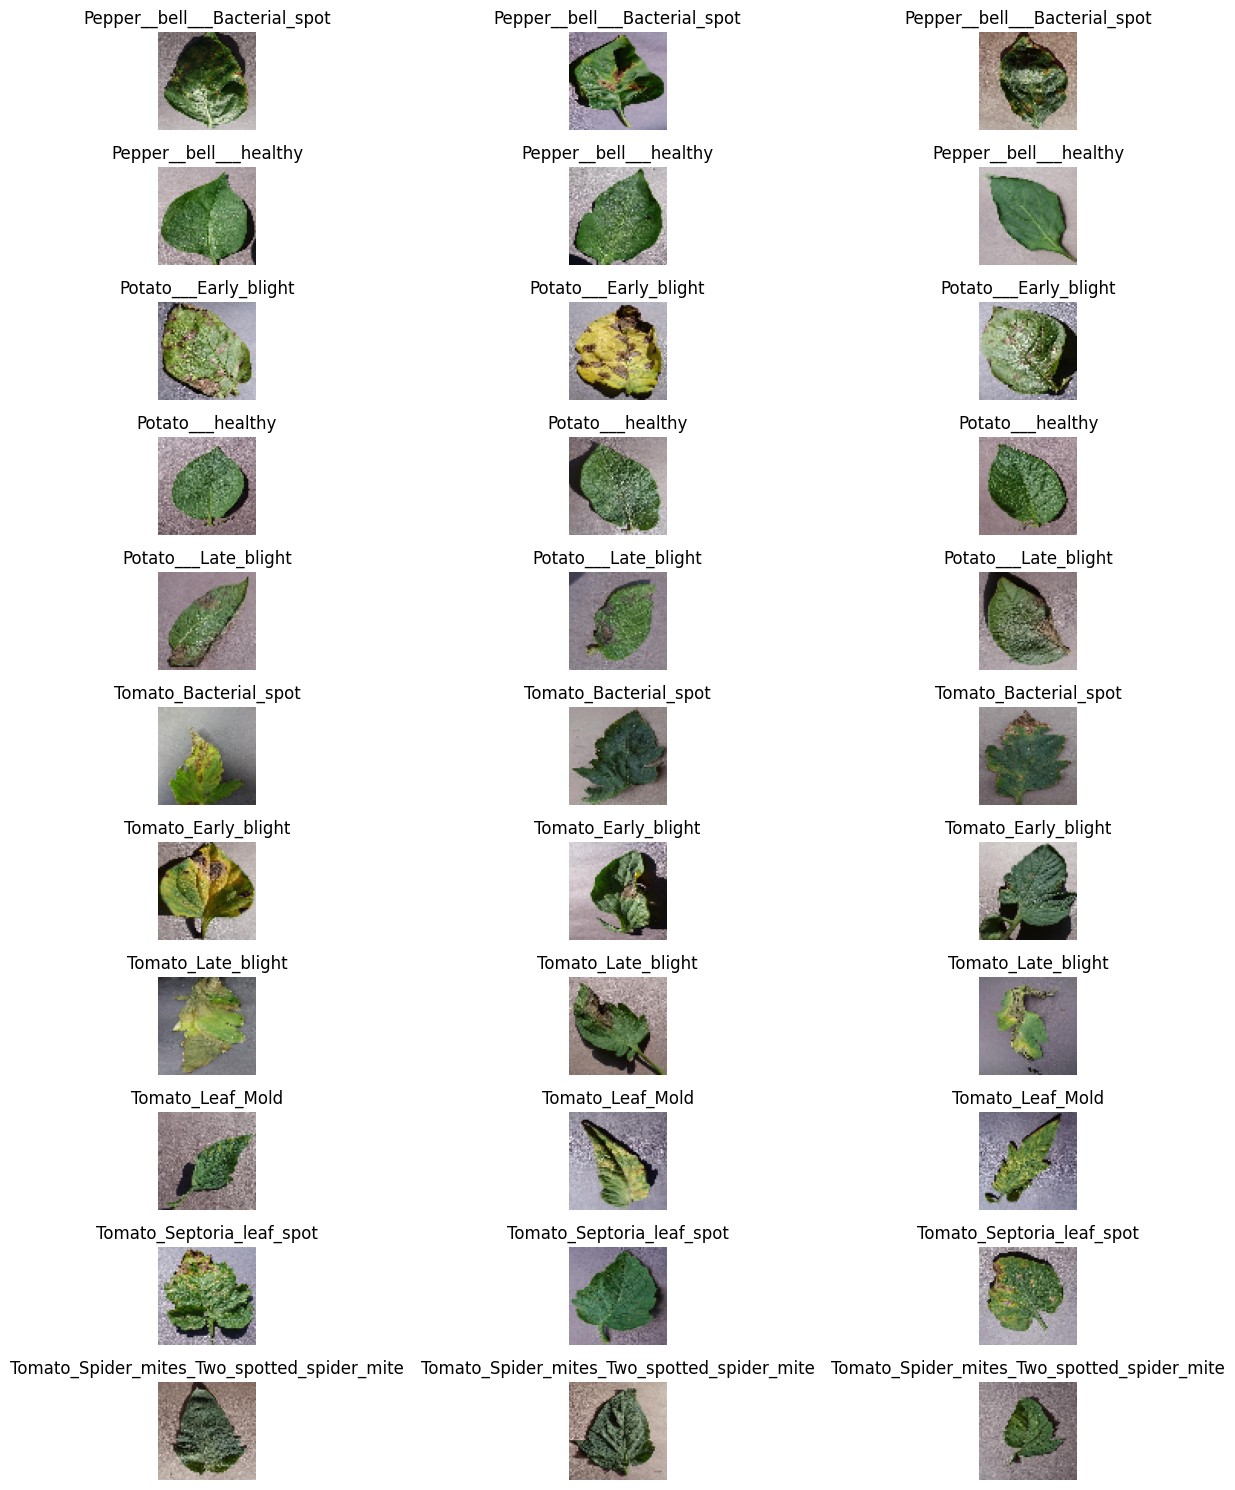

In [35]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to visualize random images from each class
def visualize_random_images(data_dir, num_images=3):
    classes = os.listdir(data_dir)  # List all classes
    plt.figure(figsize=(15, 15))
    
    for class_idx, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)
        random_images = random.sample(images, num_images)
        
        for i, img_name in enumerate(random_images):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(64, 64))
            plt.subplot(len(classes), num_images, class_idx * num_images + i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize random images from the dataset
visualize_random_images('Data/')


2. Data Augmentation Visualization
We’ll display how the images are augmented (e.g., rotated, zoomed, etc.).

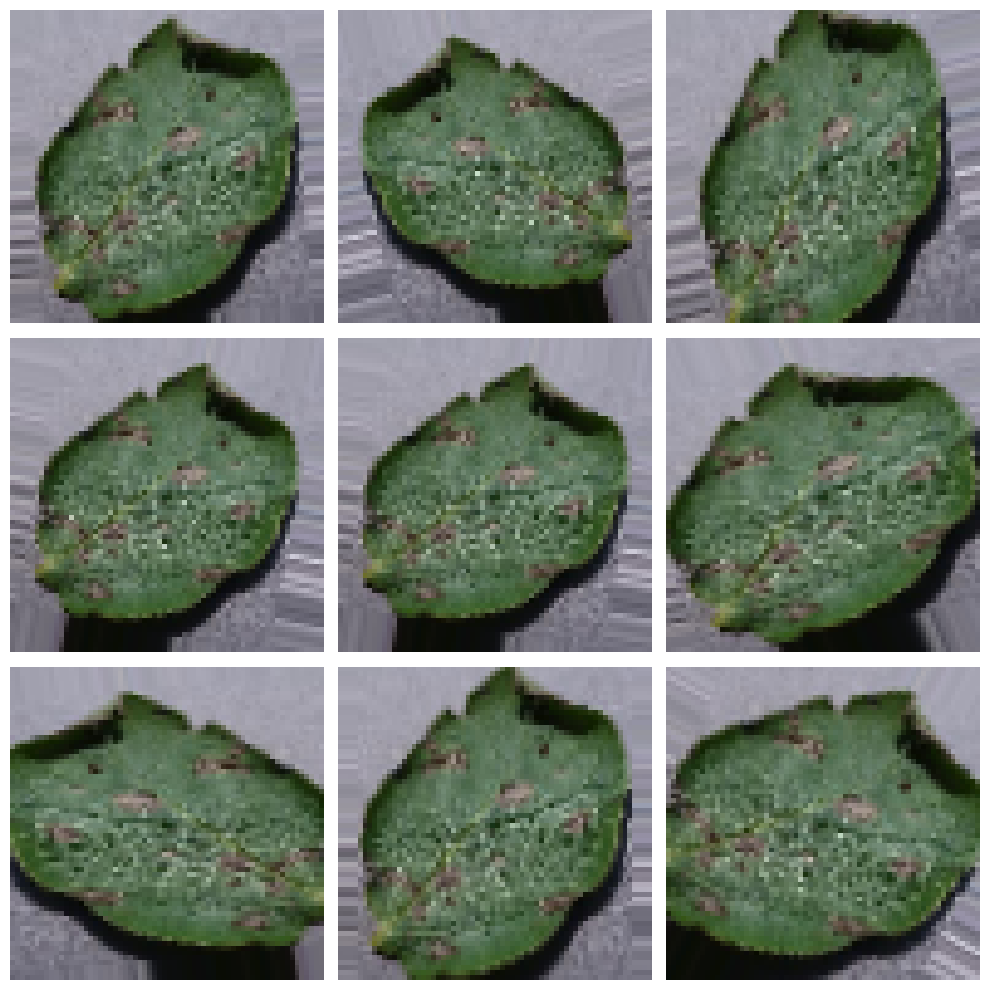

In [36]:
# Visualize augmented images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(rotation_range=30, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)

# Get one image to apply augmentations
img_path = 'Data/Potato___Early_blight/disease.JPG'  # Replace with the actual path to an image
img = load_img(img_path, target_size=(64, 64))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Plot augmented images
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    i += 1
    if i == 9:  # Display 9 images
        break

plt.tight_layout()
plt.show()


Simple Machine Learning Model (Without Optimization)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data preparation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'Data/', 
    target_size=(64, 64), 
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    'Data/', 
    target_size=(64, 64), 
    batch_size=32,
    class_mode='categorical'
)

# Define the simple CNN model
simple_model = Sequential()

# Input layer (Convolutional)

simple_model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))

simple_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
simple_model.add(Conv2D(64, (3, 3), activation='relu'))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
simple_model.add(Flatten())

# Fully connected layers
simple_model.add(Dense(64, activation='relu'))

simple_model.add(Dense(train_generator.num_classes, activation='softmax'))  # Adjust output to the number of classes

# Compile the model
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
simple_model.summary()


Found 13530 images belonging to 11 classes.
Found 13530 images belonging to 11 classes.


C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,323 (3.10 MB)

 Trainable params: 813,323 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

3. Training Performance Graphs
We will plot the accuracy and loss over time for both the training and validation sets.

Epoch 1/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9795 - loss: 0.0612 - val_accuracy: 0.9974 - val_loss: 0.0112
Epoch 2/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.9953 - loss: 0.0195 - val_accuracy: 0.9844 - val_loss: 0.0463
Epoch 3/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.9907 - loss: 0.0291 - val_accuracy: 0.9978 - val_loss: 0.0116
Epoch 4/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.9975 - loss: 0.0101 - val_accuracy: 0.9993 - val_loss: 0.0045
Epoch 5/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.9877 - loss: 0.0361 - val_accuracy: 0.9821 - val_loss: 0.0533
Epoch 6/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.9903 - loss: 0.0313 - val_accuracy: 0.9964 - val_loss: 0.0136
Epoch 7/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.9978 - loss: 0.0081 - val_accuracy: 0.9999 - val_loss: 0.0016
Epoch 8/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 1.0000 - loss: 8.6049e-0

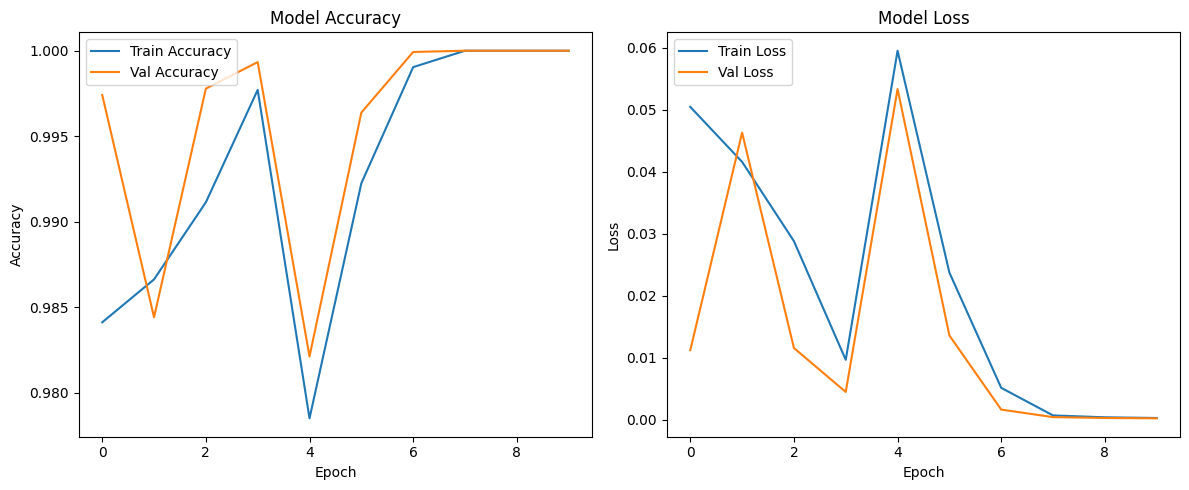

Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 1.0000 - loss: 1.7955e-04 - val_accuracy: 1.0000 - val_loss: 2.2063e-04
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 1.0000 - loss: 3.6680e-05 - val_accuracy: 1.0000 - val_loss: 3.1007e-04
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 1.0000 - loss: 1.5995e-04 - val_accuracy: 1.0000 - val_loss: 2.1975e-04
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 1.0000 - loss: 1.1339e-04 - val_accuracy: 1.0000 - val_loss: 1.9865e-05
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 1.0000 - loss: 1.3110e-04 - val_accuracy: 1.0000 - val_loss: 2.2206e-04
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 70us/step - accuracy: 1.0000 - loss: 6.8678e-05 - val_accuracy: 1.0000 - val_loss: 1.6465e-04
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 1.0000 - loss: 1.1419e-04 - val_accuracy: 1.0000 - val_loss: 2.0177e-04
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━

Final Training Accuracy: 100.00%
Final Validation Accuracy: 100.00%


In [44]:
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_simple = simple_model.fit(train_data, epochs=10, validation_data=val_data)

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot training history for the simple model
plot_training_history(history_simple)

# Train the simple model
history_simple = simple_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Save the simple model
simple_model.save('saved_models/simple_model.h5')
# Convert to percentages
train_acc_percent = train_acc * 100
val_acc_percent = val_acc * 100

# Print accuracy percentages
print(f"Final Training Accuracy: {train_acc_percent:.2f}%")
print(f"Final Validation Accuracy: {val_acc_percent:.2f}%")



Train the Simple Model

Optimized Machine Learning Model (with Optimization Techniques)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the optimized CNN model
optimized_model = Sequential()

# First convolutional layer with L2 regularization
optimized_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l2(0.001)))
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with L2 regularization
optimized_model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout to prevent overfitting
optimized_model.add(Dropout(0.5))

# Flatten layer
optimized_model.add(Flatten())

# Fully connected layers with regularization and dropout
optimized_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
optimized_model.add(Dropout(0.5))
optimized_model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the optimized model
optimized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Print model summary
optimized_model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,571 (6.20 MB)

 Trainable params: 1,626,571 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Train the Optimized Model

In [48]:
# Train the optimized model with early stopping and learning rate scheduling
history_optimized = optimized_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30,  # You can increase this as needed
    callbacks=[early_stopping, reduce_lr]
)

# Save the optimized model
optimized_model.save('saved_models/optimized_model.h5')
# Convert to percentages
train_acc_percent = train_acc * 100
val_acc_percent = val_acc * 100

# Print accuracy percentages
print(f"Final Training Accuracy: {train_acc_percent:.2f}%")
print(f"Final Validation Accuracy: {val_acc_percent:.2f}%")



Epoch 1/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.5785 - loss: 1.4470 - val_accuracy: 0.7083 - val_loss: 1.0674 - learning_rate: 0.0010
Epoch 2/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.6875 - loss: 1.0532 - val_accuracy: 0.5714 - val_loss: 1.1855 - learning_rate: 0.0010
Epoch 3/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.6710 - loss: 1.1991 - val_accuracy: 0.7507 - val_loss: 0.9906 - learning_rate: 0.0010
Epoch 4/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.6875 - loss: 1.3722 - val_accuracy: 0.6429 - val_loss: 1.0884 - learning_rate: 0.0010
Epoch 5/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 27s 79ms/step - accuracy: 0.7142 - loss: 1.1068 - val_accuracy: 0.7716 - val_loss: 0.9457 - learning_rate: 0.0010
Epoch 6/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 111us/step - accuracy: 0.7500 - loss: 1.3629 - val_accuracy: 0.7857 - val_loss: 1.1516 - learning_rate: 0.0010
Epoch 7/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - accuracy: 0.7419 - l

Final Training Accuracy: 100.00%
Final Validation Accuracy: 100.00%


In [49]:
!pip install seaborn


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


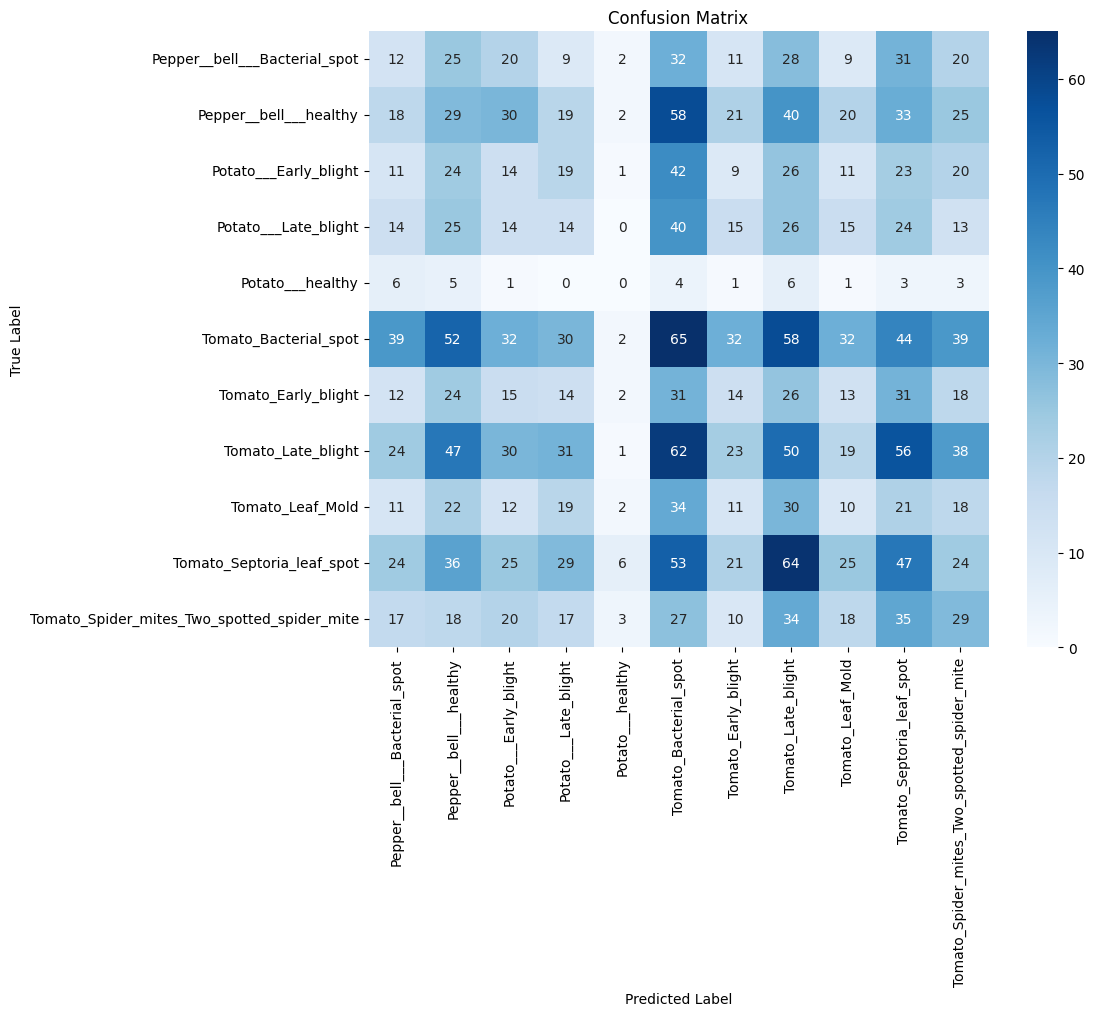

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get true labels and predicted labels
Y_pred = optimized_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
